<a href="https://colab.research.google.com/github/nishu-mns/ML-Labs/blob/main/ML_Lab12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
type(X_train), len(X_train), len(X_test), len(y_train)

(numpy.ndarray, 60000, 10000, 60000)

In [12]:
# convert the data to float
X_train = X_train.astype(dtype=np.float32)
X_test = X_test.astype(dtype=np.float32)

In [13]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [14]:
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [15]:
X_train = X_train / 255.0
X_test = X_test / 255.0
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [16]:
X_train_data = torch.from_numpy(X_train)
X_test_data = torch.from_numpy(X_test)
y_train_data = torch.from_numpy(y_train)
y_test_data = torch.from_numpy(y_test)

X_train_data.shape, y_train_data.shape

(torch.Size([60000, 784]), torch.Size([60000]))

In [17]:
batch_size = 32 #@param {type: "number"}
iterations = 10000 #@param {type: "number"}
epochs = iterations / (len(X_train) / batch_size)
epochs = int(epochs)
epochs

5

In [18]:
dataloader = DataLoader(dataset=X_train_data, batch_size=batch_size, shuffle=False)
outputloader = DataLoader(dataset=y_train_data, batch_size=batch_size, shuffle=False)
testloader = DataLoader(dataset=X_test_data, batch_size=batch_size, shuffle=False)
testoploader = DataLoader(dataset=y_test_data, batch_size=batch_size, shuffle=False)

In [19]:
def image_display(arr):
    arr = arr.cpu().detach().numpy()
    arr = arr.reshape(28, 28)
    plt.imshow(arr)

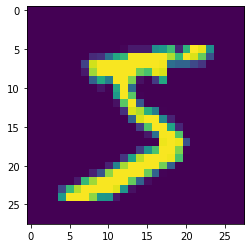

In [20]:
image_display(X_train_data[0])

In [21]:
class ANNModel(nn.Module):
    def __init__(self, input, hidden, output):
        super(ANNModel, self).__init__()
        self.linear1 = nn.Linear(input, hidden)
        self.linear2 = nn.Linear(hidden, output)
    def forward(self, X):
        X = X.view(-1, 28*28)
        X = torch.sigmoid(self.linear1(X))
        X = self.linear2(X)
        return X

In [22]:
input_dim = (28 * 28)
hidden_dim = (28 * 10)
output_dim = 10

model = ANNModel(input_dim, hidden_dim, output_dim)

model.parameters

<bound method Module.parameters of ANNModel(
  (linear1): Linear(in_features=784, out_features=280, bias=True)
  (linear2): Linear(in_features=280, out_features=10, bias=True)
)>

In [23]:
criterion = nn.CrossEntropyLoss()
learning_rate = 0.02 #@param {type: "number"}
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [24]:
count = 0
loss_list = []
iteration_list = []
accuracy_list = []

for epoch in range(epochs):
    for i, j in zip(dataloader, outputloader):
        optimizer.zero_grad()
        train = Variable(i)
        labels = Variable(j)
        predictions = model(train)
        loss = nn.functional.cross_entropy(predictions, labels)
        count += 1
        loss.backward()
        optimizer.step()
        if count % 1000 == 0:
            correct = 0
            total = 0
            with torch.no_grad():
              for ti, tj in zip(dataloader, outputloader):
                test = Variable(ti)
                testop = Variable(tj)
                predictions = model(test)
                _, predicted = torch.max(predictions.data, 1)
                total += testop.size(0)
                correct += (predicted == testop).sum().item()
            accuracy = 100 * correct / total
            accuracy_list.append(accuracy)
            print("Loss ... ", loss)
            print("Accuracy ... \n", accuracy)
            loss_list.append(loss.item())
            iteration_list.append(count)

Loss ...  tensor(1.1903, grad_fn=<NllLossBackward0>)
Accuracy ... 
 76.80333333333333
Loss ...  tensor(0.6383, grad_fn=<NllLossBackward0>)
Accuracy ... 
 84.22166666666666
Loss ...  tensor(0.5926, grad_fn=<NllLossBackward0>)
Accuracy ... 
 86.64833333333333
Loss ...  tensor(0.4703, grad_fn=<NllLossBackward0>)
Accuracy ... 
 88.14666666666666
Loss ...  tensor(0.4430, grad_fn=<NllLossBackward0>)
Accuracy ... 
 89.08833333333334
Loss ...  tensor(0.3548, grad_fn=<NllLossBackward0>)
Accuracy ... 
 89.21166666666667
Loss ...  tensor(0.3764, grad_fn=<NllLossBackward0>)
Accuracy ... 
 89.91166666666666
Loss ...  tensor(0.4461, grad_fn=<NllLossBackward0>)
Accuracy ... 
 90.05
Loss ...  tensor(0.1813, grad_fn=<NllLossBackward0>)
Accuracy ... 
 90.36


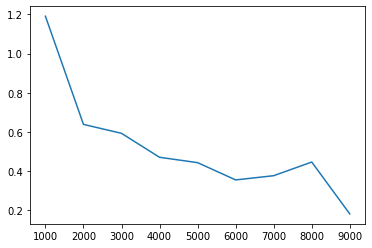

In [25]:
plt.plot(iteration_list, loss_list)
plt.show()